<a href="https://colab.research.google.com/github/AndSiq97/COVID-19-and-Vaccination-Analysis/blob/main/COVID_19_Vaccine_Side_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [75]:
# Uncomment this cell, Run this, comment cell, restart runtime and run everything else
# !pip install --upgrade matplotlib
# !pip install pyLDAvis
# !pip install -U gensim

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [4]:
# To unmount Google Drive from Google Colab
# drive.flush_and_unmount()

In [5]:
# Reading Vaccine csv files 
vaccine_adverse_data = pd.read_csv("/content/gdrive/MyDrive/2021VAERSData/2021VAERSDATA.csv", encoding = "ISO-8859-1") 
vaccine_symptoms_data = pd.read_csv("/content/gdrive/MyDrive/2021VAERSData/2021VAERSSYMPTOMS.csv")
vaccine_data = pd.read_csv("/content/gdrive/MyDrive/2021VAERSData/2021VAERSVAX.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,9,10,12,15,23,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Vaccine Adverse Reactions

In [6]:
# Check first 5 rows of dataframe of vaccine_adverse_data
vaccine_adverse_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [7]:
# Columns of vaccine_adverse_data
vaccine_adverse_data.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [8]:
# Shape of vaccine_adverse_data
vaccine_adverse_data.shape

(721470, 35)

Vaccine Symptoms

In [9]:
# Check first 5 rows of dataframe of vaccine_symptoms_data
vaccine_symptoms_data.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [10]:
# Columns of vaccine_symptoms_data
vaccine_symptoms_data.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [11]:
# Shape of vaccine_symptoms_data
vaccine_symptoms_data.shape

(964621, 11)

Vaccine Data

In [12]:
# Check first 5 rows of dataframe of vaccine_data
vaccine_data.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [13]:
# Columns of vaccine_data
vaccine_data.columns

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [14]:
# Shape of vaccine_data
vaccine_data.shape

(762762, 8)

Merging DataFrames Based on VAERS_ID and Analyzing

In [15]:
vaers_data = pd.merge(vaccine_data, vaccine_symptoms_data, how = 'outer', on = 'VAERS_ID')
vaers_data = pd.merge(vaers_data, vaccine_adverse_data, how = 'outer', on = 'VAERS_ID')
vaers_data.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [16]:
# Fill Null Values for DIED, L_THREAT, ER_VISIT, HOSPITAL, DISABLE, X_STAY, DISABLE, RECOVD, BIRTH_DEFECT, OFC_VISIT, and ER_ED_VISIT columns (Yes or No Questions)
vaers_data['DIED'].fillna('N', inplace=True)
# vaers_data['DIED'] = vaers_data['DIED'].fillna('N')
vaers_data['L_THREAT'].fillna('N', inplace=True)
vaers_data['ER_VISIT'].fillna('N', inplace=True)
vaers_data['HOSPITAL'].fillna('N', inplace=True)
vaers_data['X_STAY'].fillna('N', inplace=True)
vaers_data['DISABLE'].fillna('N', inplace=True)
vaers_data['RECOVD'].fillna('N', inplace=True)
vaers_data['BIRTH_DEFECT'].fillna('N', inplace=True)
vaers_data['OFC_VISIT'].fillna('N', inplace=True)
vaers_data['ER_ED_VISIT'].fillna('N', inplace=True)

In [17]:
# Columns of vaers_data
vaers_data.columns

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5',
       'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE',
       'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES'],
      dtype='object')

In [18]:
# Shape of vaers_data
vaers_data.shape

(1026545, 52)

In [19]:
# Number of Unique Vaccine Types 
print("There are " + str(len(vaers_data['VAX_TYPE'].unique())) + " Vaccine Types")

# Unique Countries
vaers_data['VAX_TYPE'].unique()

There are 70 Vaccine Types


array(['COVID19', 'FLUC4', 'DTAPHEPBIP', 'HIBV', 'PNC13', 'RV1', 'UNK',
       'FLU4', 'PPV', 'FLUA3', 'VARZOS', 'MMR', 'DT', 'HPV9', 'DTAP',
       'MMRV', 'TDAP', 'FLUR4', 'DTAPIPVHIB', 'HEPA', 'MNQ', 'FLUX', 'YF',
       'ANTH', 'HEP', 'VARCEL', 'RV5', 'HPV4', 'MENB', 'IPV', 'RAB',
       'FLUA4', 'FLUN4', 'DTAPIPV', 'TYP', 'ADEN_4_7', 'CHOL', 'TTOX',
       'FLU3', 'FLUC3', 'HEPAB', 'TD', 'EBZR', 'PNC', 'DF', 'HPVX',
       'FLUX(H1N1)', 'RVX', 'DTP', 'MEN', 'JEV1', 'BCG', 'PER', 'SMALL',
       'OPV', 'TDAPIPV', 'MENHIB', 'FLUN3', 'FLU(H1N1)', '6VAX-F',
       'MNQHIB', 'DTPHEP', 'JEVX', 'DTPPVHBHPB', 'FLUR3', 'DTOX', 'MU',
       'HEPATYP', 'PNC10', 'H5N1'], dtype=object)

In [20]:
# Only Interested in COVID-19 Vaccine Type
vaers_data = vaers_data[vaers_data.VAX_TYPE == 'COVID19']

# Shape of vaers_data now for ONLY COVID-19 Vaccine Type
vaers_data.shape

(962571, 52)

In [21]:
# Number of Unique COVID-19 Vaccine Manufacturers  
print("There are " + str(len(vaers_data['VAX_MANU'].unique())) + " Vaccine Manufacturers for COVID-19")

# Unique COVID-19 Vaccine Manufacturers
vaers_data['VAX_MANU'].value_counts()

There are 4 Vaccine Manufacturers for COVID-19


MODERNA                 438265
PFIZER\BIONTECH         433604
JANSSEN                  88568
UNKNOWN MANUFACTURER      2134
Name: VAX_MANU, dtype: int64

In [22]:
# Number of Unique COVID-19 Vaccine Manufacturers Names 
print("There are " + str(len(vaers_data['VAX_NAME'].unique())) + " Vaccine Manufacturers Names for COVID-19")

# Unique COVID-19 Vaccine Manufacturers Names
vaers_data['VAX_NAME'].value_counts()

There are 4 Vaccine Manufacturers Names for COVID-19


COVID19 (COVID19 (MODERNA))            438265
COVID19 (COVID19 (PFIZER-BIONTECH))    433604
COVID19 (COVID19 (JANSSEN))             88568
COVID19 (COVID19 (UNKNOWN))              2134
Name: VAX_NAME, dtype: int64

Vaccine Manufacturers Frequencies for COVID-19

In [23]:
group = vaers_data.groupby("VAX_MANU").size()
group

VAX_MANU
JANSSEN                  88568
MODERNA                 438265
PFIZER\BIONTECH         433604
UNKNOWN MANUFACTURER      2134
dtype: int64

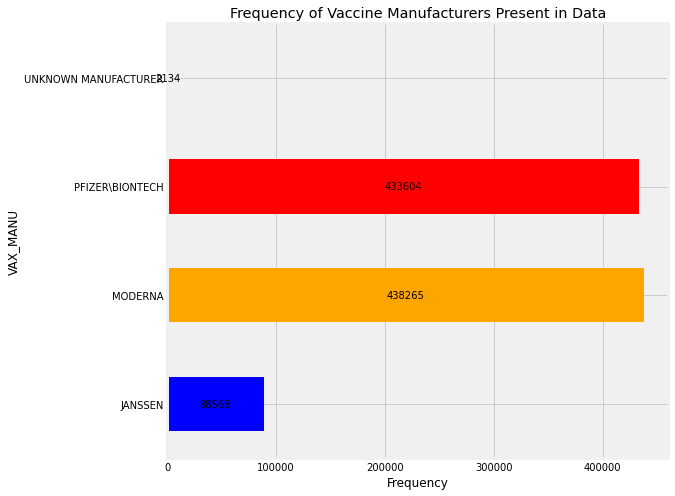

In [24]:
plt.figure(figsize=(8,8))
ax = group.plot(kind='barh', color=['blue','orange', 'red', 'green'], stacked=False, rot=0)
plt.title("Frequency of Vaccine Manufacturers Present in Data")
plt.xlabel("Frequency")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Frequencies Between Genders (Male or Female or Unknown) Present in Data

In [25]:
group = vaers_data.groupby("SEX").size()
group

SEX
F    658389
M    277494
U     26688
dtype: int64

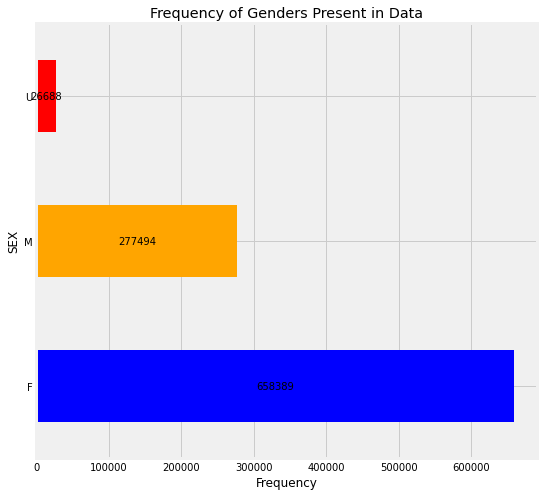

In [26]:
plt.figure(figsize=(8,8))
ax = group.plot(kind='barh', color=['blue','orange', 'red', 'green'], stacked=False, rot=0)
plt.title("Frequency of Genders Present in Data")
plt.xlabel("Frequency")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Age by Vaccine Manufacturer for COVID-19

In [27]:
# Frequency of Vaccine Manufacturers in Symptoms and Adverse Dataframe 
group = vaers_data.groupby("VAX_MANU")['AGE_YRS'].mean()
group

VAX_MANU
JANSSEN                 45.782665
MODERNA                 52.908125
PFIZER\BIONTECH         47.978222
UNKNOWN MANUFACTURER    50.763263
Name: AGE_YRS, dtype: float64

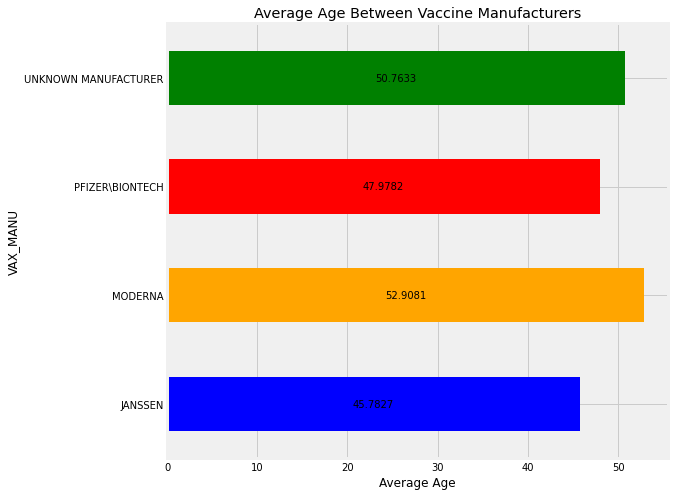

In [28]:
plt.figure(figsize=(8,8))
ax = group.plot(kind='barh', color=['blue','orange', 'red', 'green'], stacked=False, rot=0)
plt.title("Average Age Between Vaccine Manufacturers")
plt.xlabel("Average Age")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Symptoms Based on Each Vaccine Manufacturers 

In [29]:
# Some text preprocessing of Symptoms Columns (Lower Case)
symptoms_lst = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for symptom in symptoms_lst:
  vaers_data[symptom] = vaers_data[symptom].apply(lambda text: str(text).lower())

<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: DeprecationWarning: invalid escape sequence \B
<input>:1: Dep

Frequency of Symptoms after JANSSEN Vaccination for COVID-19
        
                Symptom  Frequency of Symptom  Symptom Proportion
1              headache               15652.0            0.035345
2               pyrexia               13210.0            0.029830
3                chills               11267.0            0.025443
4               fatigue               10734.0            0.024239
5                  pain               10729.0            0.024228
6             dizziness                8313.0            0.018772
7                nausea                8017.0            0.018104
8     pain in extremity                6253.0            0.014120
9               myalgia                4176.0            0.009430
10             dyspnoea                4138.0            0.009344
11           arthralgia                3640.0            0.008220
12  injection site pain                3639.0            0.008217
13        hyperhidrosis                3558.0            0.008035
14    

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Frequency of Symptoms after MODERNA Vaccination for COVID-19
        
                    Symptom  Frequency of Symptom  Symptom Proportion
1                  headache               55376.0            0.025271
2                   pyrexia               51154.0            0.023344
3                   fatigue               48114.0            0.021957
4                    chills               43993.0            0.020076
5                      pain               40669.0            0.018559
6         pain in extremity               33965.0            0.015500
7                    nausea               31130.0            0.014206
8                 dizziness               27544.0            0.012570
9       injection site pain               23383.0            0.010671
10  injection site erythema               22966.0            0.010480
11                  myalgia               22164.0            0.010114
12               arthralgia               19261.0            0.008790
13                  

<Figure size 1800x1440 with 0 Axes>

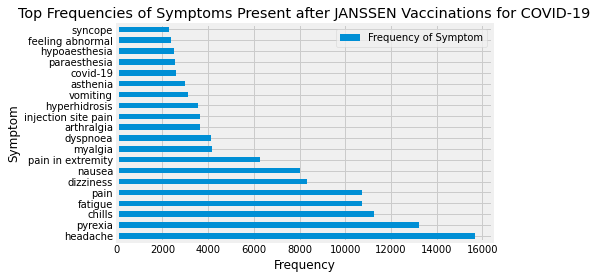

<Figure size 1800x1440 with 0 Axes>

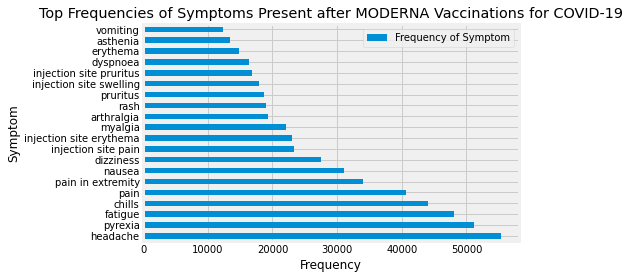

<Figure size 1800x1440 with 0 Axes>

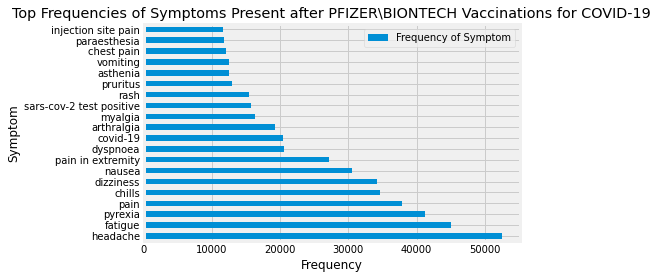

<Figure size 1800x1440 with 0 Axes>

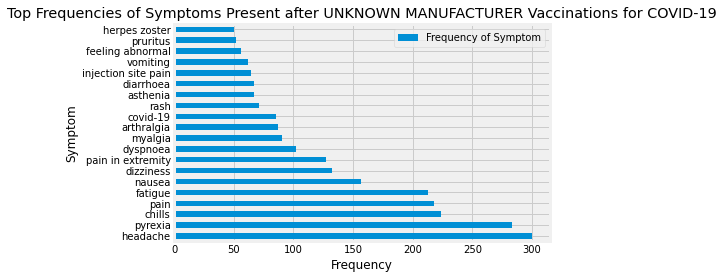

In [30]:
vax_manu = ['JANSSEN', 'MODERNA', 'PFIZER\BIONTECH', 'UNKNOWN MANUFACTURER'] 
for vax in vax_manu:
  vaccine_manufacturer = vaers_data.loc[vaers_data['VAX_MANU'] == vax]
  symptom_1 = pd.DataFrame(vaccine_manufacturer['SYMPTOM1'].value_counts())
  symptom_2 = pd.DataFrame(vaccine_manufacturer['SYMPTOM2'].value_counts())
  symptom_3 = pd.DataFrame(vaccine_manufacturer['SYMPTOM3'].value_counts())
  symptom_4 = pd.DataFrame(vaccine_manufacturer['SYMPTOM4'].value_counts())
  symptom_5 = pd.DataFrame(vaccine_manufacturer['SYMPTOM5'].value_counts())
  all_symptoms = pd.concat([symptom_1, symptom_2, symptom_3, symptom_4, symptom_5], axis = 1)
  all_symptoms['ALL_SYMPTOMS']= all_symptoms[symptoms_lst].sum(axis=1)
  all_symptoms['Symptom Proportion'] = all_symptoms['ALL_SYMPTOMS'] / all_symptoms['ALL_SYMPTOMS'].sum() 
  all_symptoms = pd.DataFrame(all_symptoms[['ALL_SYMPTOMS', 'Symptom Proportion']])
  all_symptoms.rename(columns={'ALL_SYMPTOMS': 'Frequency of Symptom'}, inplace=True)
  all_symptoms.sort_values(by=['Frequency of Symptom'], ascending=False, inplace = True)
  all_symptoms.reset_index(inplace = True)
  all_symptoms = all_symptoms[all_symptoms['index'] != 'nan']
  all_symptoms.rename(columns={'index': 'Symptom'}, inplace=True)
  print("Frequency of Symptoms after " + vax + " Vaccination for COVID-19")
  print("        ")
  print(pd.DataFrame(all_symptoms).head(20))
  print("              ")
  plt.figure(figsize=(25,20))
  all_symptoms[0:20].plot.barh(x='Symptom', y='Frequency of Symptom')
  plt.title("Top Frequencies of Symptoms Present after " + vax + " Vaccinations for COVID-19")
  plt.xlabel("Frequency")
  plt.ylabel("Symptom")
  print("              ")
  print("              ")
  print("              ")

Proportion of Males/Females/Unknown Genders Between Each Vaccine Type for COVID-19

In [31]:
ct = pd.crosstab(vaers_data.SEX, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
SEX,,,,
F,0.080829,0.469069,0.448159,0.001943
M,0.109516,0.417523,0.470338,0.002623
U,0.185889,0.508656,0.300697,0.004759


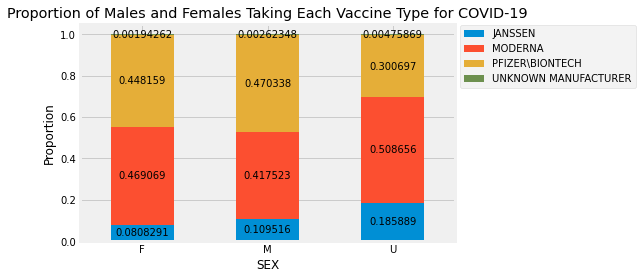

In [32]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Males and Females Taking Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Males/Females/Unknown Genders for Each Vaccine Type for COVID-19

In [33]:
perc = vaers_data.groupby(['VAX_MANU'])['SEX'].value_counts(normalize=True)
pd.DataFrame(perc)

SEX
VAX_MANU             SEX          
JANSSEN              F    0.600860
                     M    0.343126
                     U    0.056013
MODERNA              F    0.704665
                     M    0.264361
                     U    0.030974
PFIZER\BIONTECH      F    0.680490
                     M    0.301003
                     U    0.018508
UNKNOWN MANUFACTURER F    0.599344
                     M    0.341143
                     U    0.059513

<Figure size 864x864 with 0 Axes>

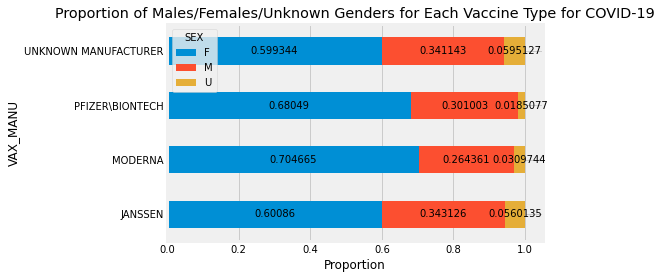

In [34]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of Males/Females/Unknown Genders for Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People that Have Died Between Each Vaccine Type for COVID-19

In [35]:
ct = pd.crosstab(vaers_data.DIED, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
DIED,,,,
N,0.091827,0.456256,0.449722,0.002195
Y,0.101802,0.405138,0.489702,0.003358


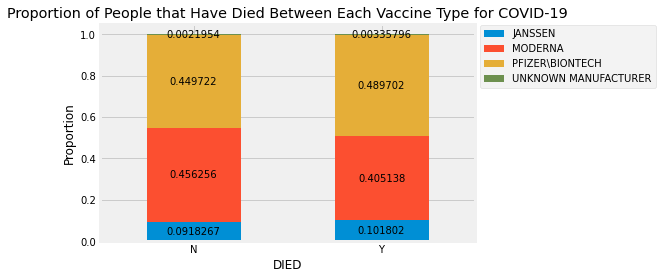

In [36]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of People that Have Died Between Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People that Have Died For Each Vaccine Type for COVID-19

In [37]:
perc = vaers_data.groupby(['VAX_MANU'])['DIED'].value_counts(normalize=True)
pd.DataFrame(perc)

DIED
VAX_MANU             DIED          
JANSSEN              N     0.979462
                     Y     0.020538
MODERNA              N     0.983483
                     Y     0.016517
PFIZER\BIONTECH      N     0.979820
                     Y     0.020180
UNKNOWN MANUFACTURER N     0.971884
                     Y     0.028116

<Figure size 864x864 with 0 Axes>

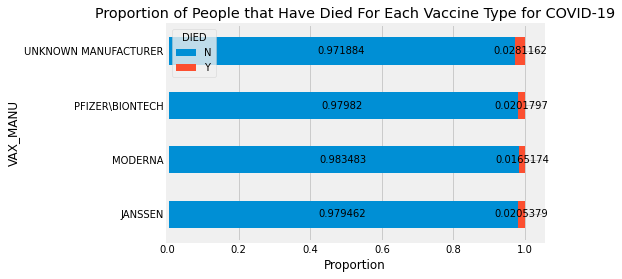

In [38]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of People that Have Died For Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People with ER Visit Between Each Vaccine Type for COVID-19

In [39]:
ct = pd.crosstab(vaers_data.ER_VISIT, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
ER_VISIT,,,,
N,0.092016,0.455308,0.450459,0.002217
Y,0.031250,0.437500,0.531250,0.000000


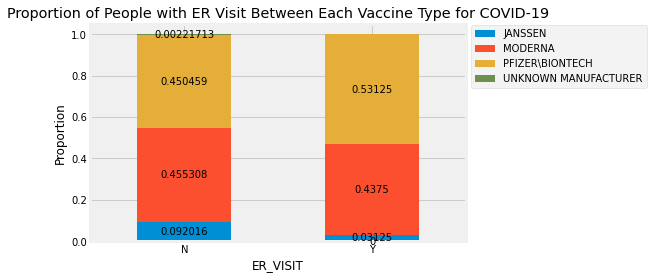

In [40]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of People with ER Visit Between Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People with ER Visit For Each Vaccine Type for COVID-19

In [41]:
perc = vaers_data.groupby(['VAX_MANU'])['ER_VISIT'].value_counts(normalize=True)
pd.DataFrame(perc)

ER_VISIT
VAX_MANU             ER_VISIT          
JANSSEN              N         0.999977
                     Y         0.000023
MODERNA              N         0.999936
                     Y         0.000064
PFIZER\BIONTECH      N         0.999922
                     Y         0.000078
UNKNOWN MANUFACTURER N         1.000000

<Figure size 864x864 with 0 Axes>

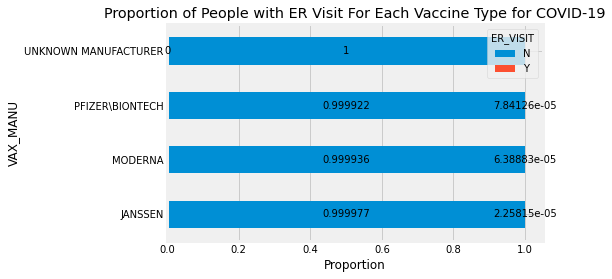

In [42]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of People with ER Visit For Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People Hospitalized Between Each Vaccine Type for COVID-19

In [43]:
ct = pd.crosstab(vaers_data.HOSPITAL, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
HOSPITAL,,,,
N,0.091042,0.464893,0.442022,0.002044
Y,0.100163,0.374742,0.521421,0.003674


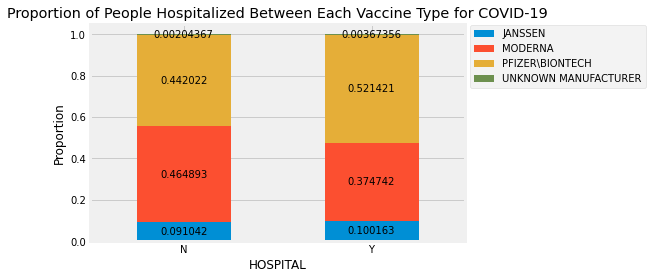

In [44]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of People Hospitalized Between Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People Hospitalized For Each Vaccine Type for COVID-19

In [45]:
perc = vaers_data.groupby(['VAX_MANU'])['HOSPITAL'].value_counts(normalize=True)
pd.DataFrame(perc)

HOSPITAL
VAX_MANU             HOSPITAL          
JANSSEN              N         0.884247
                     Y         0.115753
MODERNA              N         0.912482
                     Y         0.087518
PFIZER\BIONTECH      N         0.876918
                     Y         0.123082
UNKNOWN MANUFACTURER N         0.823805
                     Y         0.176195

<Figure size 864x864 with 0 Axes>

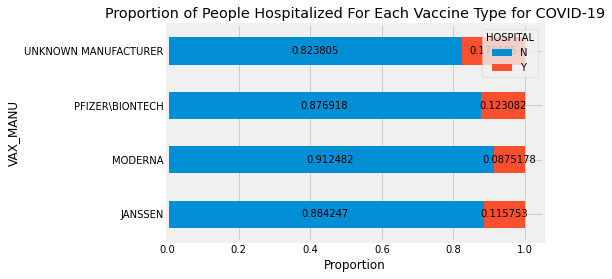

In [46]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of People Hospitalized For Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People with Life-Threatening Illness For Each Vaccine Type for COVID-19

In [47]:
ct = pd.crosstab(vaers_data.L_THREAT, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
L_THREAT,,,,
N,0.091457,0.456970,0.449413,0.002160
Y,0.113289,0.391571,0.490729,0.004411


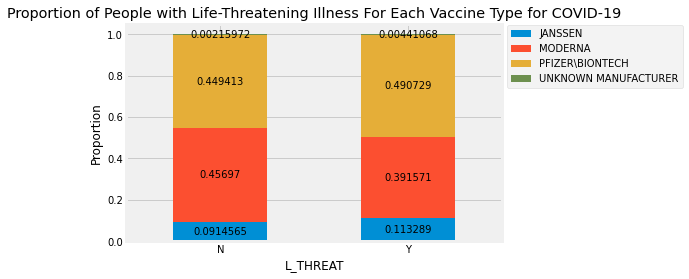

In [48]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of People with Life-Threatening Illness For Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People with Life-Threatening Illness For Each Vaccine Type for COVID-19

In [49]:
perc = vaers_data.groupby(['VAX_MANU'])['L_THREAT'].value_counts(normalize=True)
pd.DataFrame(perc)

L_THREAT
VAX_MANU             L_THREAT          
JANSSEN              N         0.968679
                     Y         0.031321
MODERNA              N         0.978123
                     Y         0.021877
PFIZER\BIONTECH      N         0.972288
                     Y         0.027712
UNKNOWN MANUFACTURER N         0.949391
                     Y         0.050609

<Figure size 864x864 with 0 Axes>

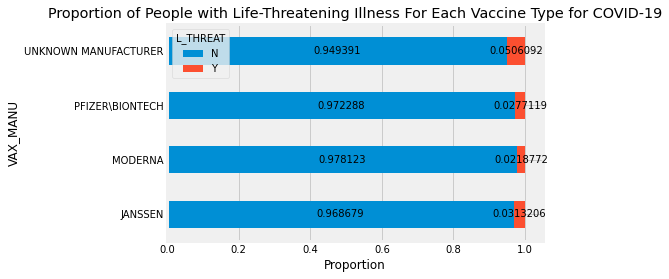

In [50]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of People with Life-Threatening Illness For Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People with a Disability Between Each Vaccine Type for COVID-19

In [51]:
ct = pd.crosstab(vaers_data.DISABLE, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
DISABLE,,,,
N,0.091847,0.456946,0.448997,0.00221
Y,0.098301,0.392796,0.506423,0.00248


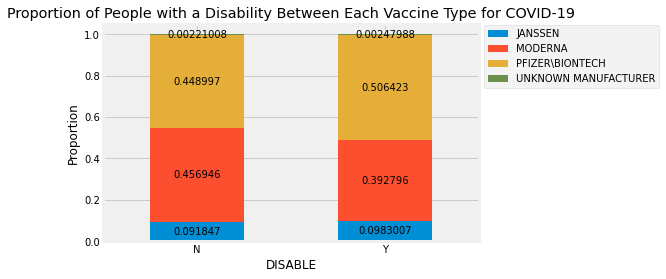

In [52]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of People with a Disability Between Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People with a Disability For Each Vaccine Type for COVID-19

In [53]:
perc = vaers_data.groupby(['VAX_MANU'])['DISABLE'].value_counts(normalize=True)
pd.DataFrame(perc)

DISABLE
VAX_MANU             DISABLE          
JANSSEN              N        0.972699
                     Y        0.027301
MODERNA              N        0.977954
                     Y        0.022046
PFIZER\BIONTECH      N        0.971271
                     Y        0.028729
UNKNOWN MANUFACTURER N        0.971415
                     Y        0.028585

<Figure size 864x864 with 0 Axes>

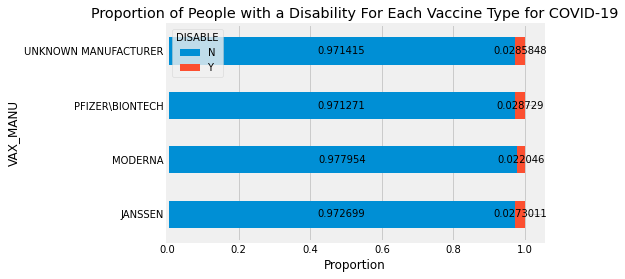

In [54]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of People with a Disability For Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People that Have Recovered Between Each Vaccine Type for COVID-19

In [55]:
ct = pd.crosstab(vaers_data.RECOVD, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
RECOVD,,,,
N,0.097593,0.415144,0.485043,0.002220
U,0.088323,0.486179,0.422981,0.002517
Y,0.085937,0.496157,0.415894,0.002012


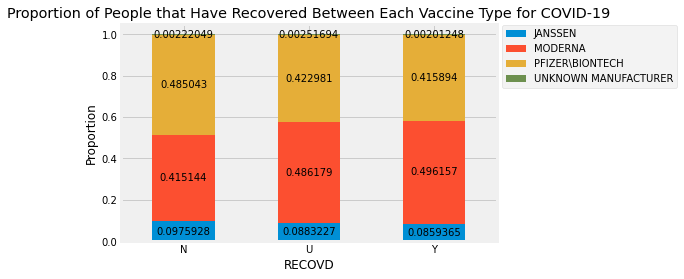

In [56]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of People that Have Recovered Between Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People that Have Recovered For Each Vaccine Type for COVID-19

In [57]:
perc = vaers_data.groupby(['VAX_MANU'])['RECOVD'].value_counts(normalize=True)
pd.DataFrame(perc)

RECOVD
VAX_MANU             RECOVD          
JANSSEN              N       0.507655
                     Y       0.292656
                     U       0.199688
MODERNA              N       0.436405
                     Y       0.341460
                     U       0.222135
PFIZER\BIONTECH      N       0.515364
                     Y       0.289299
                     U       0.195337
UNKNOWN MANUFACTURER N       0.479381
                     Y       0.284442
                     U       0.236176

<Figure size 864x864 with 0 Axes>

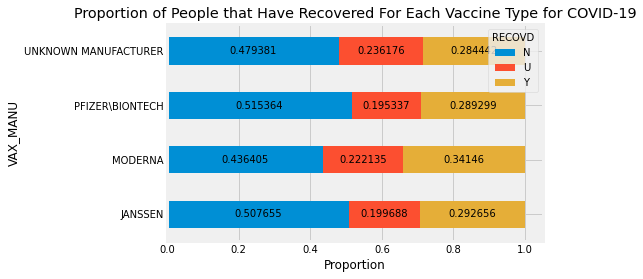

In [58]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of People that Have Recovered For Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People that Have Birth Defect Between Each Vaccine Type for COVID-19

In [59]:
ct = pd.crosstab(vaers_data.BIRTH_DEFECT, vaers_data.VAX_MANU, normalize='index')
ct

VAX_MANU,JANSSEN,MODERNA,PFIZER\BIONTECH,UNKNOWN MANUFACTURER
BIRTH_DEFECT,,,,
N,0.092013,0.455358,0.450415,0.002214
Y,0.090433,0.390564,0.512451,0.006553


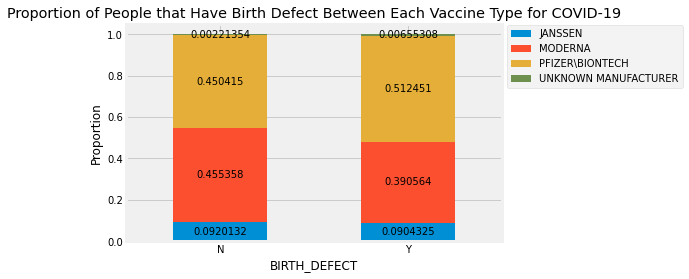

In [60]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of People that Have Birth Defect Between Each Vaccine Type for COVID-19")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of People that Have Birth Defect For Each Vaccine Type for COVID-19

In [61]:
perc = vaers_data.groupby(['VAX_MANU'])['BIRTH_DEFECT'].value_counts(normalize=True)
pd.DataFrame(perc)

BIRTH_DEFECT
VAX_MANU             BIRTH_DEFECT              
JANSSEN              N                 0.999221
                     Y                 0.000779
MODERNA              N                 0.999320
                     Y                 0.000680
PFIZER\BIONTECH      N                 0.999098
                     Y                 0.000902
UNKNOWN MANUFACTURER N                 0.997657
                     Y                 0.002343

<Figure size 864x864 with 0 Axes>

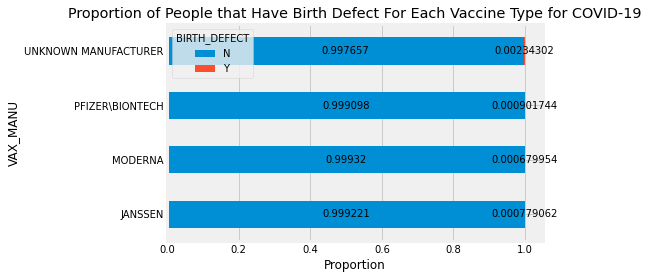

In [62]:
plt.figure(figsize=(12,12))
ax = perc.unstack().plot(kind='barh', stacked=True)
plt.title("Proportion of People that Have Birth Defect For Each Vaccine Type for COVID-19")
plt.xlabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Main Topics from Text Columns

In [63]:
# Colums of text to Extract Main Topics
text_columns = ['SYMPTOM_TEXT', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES']

# Text Columns of vaers_data 
vaers_data[text_columns].head()

,SYMPTOM_TEXT,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES
0,Right side of epiglottis swelled up and hinder...,None,None,None,NaN,Pcn and bee venom
1,Approximately 30 min post vaccination administ...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy"""
2,"About 15 minutes after receiving the vaccine, ...",None,None,None,NaN,Shellfish
3,"extreme fatigue, dizziness,. could not lift my...",none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...","Diclofenac, novacaine, lidocaine, pickles, tom..."
4,"Injection site swelling, redness, warm to the ...",Na,Na,NaN,NaN,Na


In [64]:
import spacy
import re
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer

# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner', 'tagger'])

/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will no

In [65]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
punct = string.punctuation
stopwords = list(STOP_WORDS)

In [66]:
# Getting dictionary of English words and contractions in expansion form
import requests
import ast

requests1 = requests.get('https://raw.githubusercontent.com/dwyl/english-words/master/words_dictionary.json')
requests2 = requests.get('https://raw.githubusercontent.com/kootenpv/contractions/master/contractions/data/contractions_dict.json')

english_dict = ast.literal_eval(requests1.text)
contractions_dict = ast.literal_eval(requests2.text)

In [67]:
# Text Preprocessing Functions

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punct)
    return text.translate(translator)

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
    
def remove_special_characters(text):
  return re.sub(r'[^\w ]+', "", text)

def cleaning_numbers(text):
    return re.sub('[0-9]+', '', text)

def tokenize_on_text(text):
    tokens = []
    doc = nlp(text)
    text = [tokens.append(str(word)) for word in doc]
    return tokens

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(text):
    text = [lm.lemmatize(word) for word in text]
    return text

def lemmatize(text):
  text = str(text)
  text_lst = []
  doc = nlp(text)

  for token in doc:
    lemma = token.lemma_
    if lemma == '-PRON-' or lemma == 'be':
      lemma = token.text
    text_lst.append(lemma)
  return ' '.join(text_lst)

def remove_invalid_words(text):
  text = text.split(" ")
  text_copy = text.copy()
  for word in text_copy:
    if word not in english_dict:
      text.remove(word)
  return ' '.join(text)

def contractions_expansions(text):
  text = text.split(" ")
  for i in range(len(text)):
    if text[i] in contractions_dict:
      text[i] = contractions_dict.get(text[i])
  return ' '.join(text)

nltk.download('words')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

def remove_non_english_words(text):
  invalid = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n',
             'o', 'p', 'q', 'rt', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

  text = text.split(" ")
  text_copy = text.copy()
  for word in text_copy:
    if word in invalid or word not in english_vocab:
      text.remove(word)
  return ' '.join(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [68]:
# Modifying text columns using text preprocessing
for column in text_columns:
  vaers_data[column] = vaers_data[column].apply(lambda text: str(text).lower())
  vaers_data[column] = vaers_data[column].apply(lambda text: ' '.join(text.split()))
  vaers_data[column] = vaers_data[column].apply(lambda text: contractions_expansions(text))
  vaers_data[column] = vaers_data[column].apply(lambda text: remove_special_characters(text))
  vaers_data[column] = vaers_data[column].apply(lambda text: cleaning_punctuations(text))
  vaers_data[column] = vaers_data[column].apply(lambda text: cleaning_numbers(text))
  vaers_data[column] = vaers_data[column].apply(lambda text: remove_invalid_words(text))
  vaers_data[column] = vaers_data[column].apply(lambda text: remove_non_english_words(text))
  vaers_data[column] = vaers_data[column].apply(lambda text: cleaning_stopwords(text))

In [69]:
# Inspection of Text Columns after Text Preprocessing
vaers_data[text_columns].head()

,SYMPTOM_TEXT,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES
0,right epiglottis swelled hinder taken taken,,,,nan,bee venom
1,approximately min post vaccination administrat...,patient nursing facility chart,patient nursing facility chart,patient nursing facility chart,nan,dairy
2,vaccine patient left arm hurting chest tightne...,,,,nan,shellfish
3,extreme fatigue dizziness lift left arm,,kidney infection,diverticulitis mitral valve prolapse osteoarth...,got measles shot mumps shot nausea flu shot,milk
4,injection site swelling redness warm touch itchy,na,na,nan,nan,na


In [70]:
from gensim.models.coherencemodel import CoherenceModel
# Compute coherence scores mapping to each number of topics in a Dictionary format after using LDA model

def coherence_scores_per_num_topics(dictionary, corpus, texts, start, stop):
    num_topics_and_coherence_scores = {}
    lda_models = []
    for num_topics in range(start, stop, 1):
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = num_topics, id2word = dictionary)
        lda_models.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        num_topics_and_coherence_scores[num_topics] = coherencemodel.get_coherence()

    return num_topics_and_coherence_scores, lda_models

In [71]:
import warnings
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')

from gensim.corpora.dictionary import Dictionary

def optimal_num_topics(column_name, start, stop):
  # List of Texts in a Column that Are Tokenized
  text_lst = vaers_data[column_name]
  text_lst = [text for text in text_lst if text != '' and text != 'none' and text != 'na' and text != 'nan']
  tokenized_texts = [tokenize_on_text(text_lst[i]) for i in range(len(text_lst))]

  # Create a Dictionary and Document Term Matrix Corpus
  dictionary = Dictionary(tokenized_texts)
  doc_term_matrix = [dictionary.doc2bow(tok) for tok in tokenized_texts]

  # Coherence Scores for Each Number of Topics After Using LDA Model 
  # Also get List of LDA Models for Each Number of Topics ranging from 2 to 25 topics 
  num_topics_with_coherence_scores, models = coherence_scores_per_num_topics(dictionary, doc_term_matrix, tokenized_texts, start, stop)

  # Show graph displaying Coherence Scores per Number of Topics
  lists = sorted(num_topics_with_coherence_scores.items())       # sorted by key, return a list of tuples
  num_topics, coherence_scores = zip(*lists)                     # unpack a list of pairs into two tuples
  plt.plot(num_topics, coherence_scores)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence Score")
  plt.title("Coherence Scores per Number of Topics")

  # Graph the Coherence Scores and Number of Topics 
  plt.show()
  print("           ")
  print("           ")
  
  # Getting the Ideal Number of Topics with the Maximum Coherence Score
  num_topics_with_max_coherence_score = max(num_topics_with_coherence_scores, key = num_topics_with_coherence_scores.get)
  print("Number of Topics with the Maximum Coherence Score is: ", num_topics_with_max_coherence_score)
  print("This Optimal Number of Topics has a Coherence Score of: ", num_topics_with_coherence_scores[num_topics_with_max_coherence_score]) 
  return dictionary, doc_term_matrix, models[num_topics_with_max_coherence_score - 2]

Main Allergies

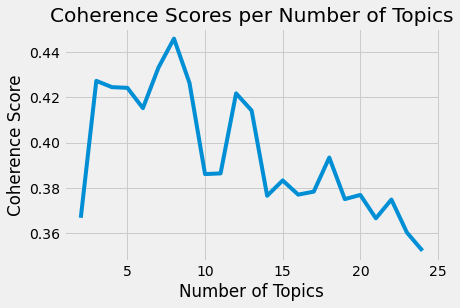

           
           
Number of Topics with the Maximum Coherence Score is:  8
This Optimal Number of Topics has a Coherence Score of:  0.44585191449988076


[(0,
  '0.143*"shellfish" + 0.084*"pollen" + 0.076*"dust" + 0.066*"tree" + 0.060*"mold" + 0.039*"grass" + 0.037*"dander" + 0.021*"coconut" + 0.021*"cat" + 0.019*"seasonal"'),
 (1,
  '0.094*"dye" + 0.071*"contrast" + 0.065*"vaccine" + 0.036*"reaction" + 0.035*"iodine" + 0.034*"flu" + 0.033*"anaphylaxis" + 0.027*"document" + 0.024*"gi" + 0.024*"breath"'),
 (2,
  '0.100*"rash" + 0.090*"allergic" + 0.082*"hives" + 0.037*"vomiting" + 0.026*"nausea" + 0.023*"itching" + 0.023*"shrimp" + 0.022*"upset" + 0.021*"reaction" + 0.018*"patient"'),
 (3,
  '0.127*"aspirin" + 0.081*"bee" + 0.052*"intolerance" + 0.052*"egg" + 0.047*"lactose" + 0.046*"milk" + 0.043*"ace" + 0.034*"venom" + 0.027*"topical" + 0.026*"soy"'),
 (4,
  '0.269*"latex" + 0.091*"gluten" + 0.066*"dairy" + 0.031*"wheat" + 0.023*"effects" + 0.021*"kiwi" + 0.019*"corn" + 0.018*"sensitive" + 0.016*"diarrhea" + 0.016*"mango"'),
 (5,
  '0.373*"penicillin" + 0.371*"sulfa" + 0.038*"adhesive" + 0.029*"demerol" + 0.026*"tape" + 0.017*"bees" + 

In [ ]:
# Print topics with Optimal Number of Topics
dictionary, doc_term_matrix, model_with_optimal_num_of_topics = optimal_num_topics('ALLERGIES', 2, 25)
model_with_optimal_num_of_topics.print_topics()

In [ ]:
# Evaluation of the model
print('Perplexity: ', model_with_optimal_num_of_topics.log_perplexity(doc_term_matrix, total_docs = 10000))  

Perplexity:  -7.328728627593137


In [ ]:
# Visualize the topics for optimal number of topics 
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(model_with_optimal_num_of_topics, doc_term_matrix, dictionary)
visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.146332 -0.163510       1        1  15.622681
5      0.051166  0.255983       2        1  15.525506
1     -0.232469 -0.152518       3        1  12.893537
6      0.276182 -0.148072       4        1  12.660374
4      0.007908  0.241878       5        1  11.620802
0      0.267509 -0.131464       6        1  11.457766
7     -0.168167 -0.063373       7        1  11.282774
3     -0.055796  0.161076       8        1   8.936559, topic_info=           Term          Freq         Total Category  logprob  loglift
6    penicillin  38201.000000  38201.000000  Default  30.0000  30.0000
8         sulfa  38014.000000  38014.000000  Default  29.0000  29.0000
39        known  23890.000000  23890.000000  Default  28.0000  28.0000
14        latex  20578.000000  20578.000000  Default  27.0000  27.0000
29      codeine  19141.000000  19141.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
145     lithium    355.045578    355.946321   Topic8  -5.1117   2.4125
118        gave    345.425206    346.333299   Topic8  -5.1392   2.4124
677    systemic    329.228334    330.131013   Topic8  -5.1872   2.4123
31      lactose   2772.210193   3910.134141   Topic8  -3.0565   2.0711
106         soy   1537.567318   2648.198676   Topic8  -3.6460   1.8713

[291 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
136       8  0.999805       ace
165       6  0.999124      acid
2512      7  0.997171     added
7         2  0.999862  adhesive
128       3  0.999226   adverse
...     ...       ...       ...
319       1  0.998208     white
846       3  0.997463      wool
381       1  0.999426     yeast
865       8  0.997978    yellow
517       7  0.999179       yes

[277 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 2, 7, 5, 1, 8, 4])

Prior Vaccinations

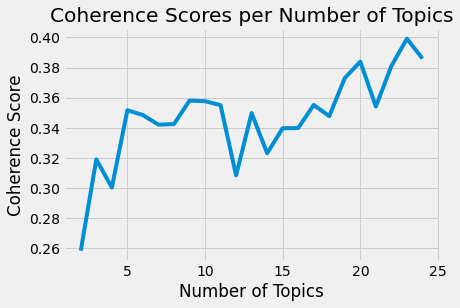

           
           
Number of Topics with the Maximum Coherence Score is:  23
This Optimal Number of Topics has a Coherence Score of:  0.3992066520557801


[(18,
  '0.246*"severe" + 0.119*"rash" + 0.090*"vomiting" + 0.067*"vaccine" + 0.056*"right" + 0.046*"swelled" + 0.046*"diarrhea" + 0.042*"leg" + 0.041*"breath" + 0.036*"shortness"'),
 (14,
  '0.426*"covid" + 0.288*"dose" + 0.155*"vaccine" + 0.091*"st" + 0.011*"days" + 0.004*"cough" + 0.004*"elevated" + 0.003*"whooping" + 0.003*"mild" + 0.002*"rash"'),
 (16,
  '0.250*"fever" + 0.156*"second" + 0.120*"fatigue" + 0.065*"dose" + 0.063*"headache" + 0.058*"body" + 0.044*"vaccine" + 0.036*"extreme" + 0.035*"nausea" + 0.033*"muscle"'),
 (22,
  '0.273*"day" + 0.105*"lasting" + 0.092*"vaccine" + 0.081*"getting" + 0.049*"minor" + 0.044*"flu" + 0.038*"high" + 0.031*"bed" + 0.030*"days" + 0.027*"causing"'),
 (11,
  '0.186*"swelling" + 0.106*"week" + 0.077*"redness" + 0.048*"itching" + 0.045*"rash" + 0.044*"later" + 0.043*"went" + 0.029*"known" + 0.026*"vaccine" + 0.026*"touch"'),
 (10,
  '0.182*"tetanus" + 0.086*"booster" + 0.072*"lymph" + 0.071*"prior" + 0.069*"chest" + 0.058*"vaccine" + 0.036*"no

In [ ]:
# Print topics with Optimal Number of Topics
dictionary, doc_term_matrix, model_with_optimal_num_of_topics = optimal_num_topics('PRIOR_VAX', 2, 25)
model_with_optimal_num_of_topics.print_topics()

In [ ]:
# Evaluation of the model
print('Perplexity: ', model_with_optimal_num_of_topics.log_perplexity(doc_term_matrix, total_docs = 10000))  

Perplexity:  -8.067756075105631


In [ ]:
# Visualize the topics for optimal number of topics 
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(model_with_optimal_num_of_topics, doc_term_matrix, dictionary)
visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6      0.277430  0.074057       1        1  8.859274
14    -0.013307 -0.143847       2        1  8.421626
16    -0.121026 -0.057055       3        1  6.909962
17     0.247826  0.281399       4        1  6.763264
0     -0.192674  0.100182       5        1  5.062746
21     0.053317 -0.166362       6        1  4.666762
7      0.004135 -0.135053       7        1  4.293950
5     -0.012266 -0.133879       8        1  4.217931
19    -0.162817  0.230086       9        1  4.179382
10     0.008329 -0.078637      10        1  4.034563
9      0.061336 -0.133821      11        1  3.916675
11    -0.104997  0.051877      12        1  3.903443
12    -0.231321  0.170646      13        1  3.805555
20     0.259291  0.149020      14        1  3.778164
15    -0.076055 -0.039748      15        1  3.721054
4     -0.159644  0.185849      16        1  3.339506
18    -0.079987 -0.058424      17        1  3.313752
3      0.056700 -0.140440      18        1  3.279578
8      0.007912 -0.066021      19        1  3.243159
2      0.008101 -0.061095      20        1  2.834719
1     -0.076804 -0.070956      21        1  2.680153
22     0.099552  0.002293      22        1  2.563005
13     0.146970  0.039927      23        1  2.211776, topic_info=            Term          Freq         Total Category  logprob  loglift
5           shot  10989.000000  10989.000000  Default  30.0000  30.0000
155        covid   8689.000000   8689.000000  Default  29.0000  29.0000
0            flu  14644.000000  14644.000000  Default  28.0000  28.0000
16           age   5663.000000   5663.000000  Default  27.0000  27.0000
12           arm   6719.000000   6719.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
329  consecutive     16.280973     17.415287  Topic23  -5.7931   3.7440
0            flu    286.390387  14644.455071  Topic23  -2.9258  -0.1231
11       vaccine    285.295160  18006.234318  Topic23  -2.9296  -0.3336
32          days     28.511732   2971.141566  Topic23  -5.2328  -0.8350
5           shot     28.125554  10989.340149  Topic23  -5.2464  -2.1566

[883 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
433      14  0.958873       able
141      12  0.965946   abnormal
522      19  0.914384    abscess
633      20  0.979999  according
412       4  0.923974       ache
...     ...       ...        ...
301       6  0.993206        yes
79       18  0.996527         yo
162      12  0.988843      young
539      18  0.987793         yr
202      22  0.986950     zoster

[1109 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 15, 17, 18, 1, 22, 8, 6, 20, 11, 10, 12, 13, 21, 16, 5, 19, 4, 9, 3, 2, 23, 14])

Medical Histories of Patients

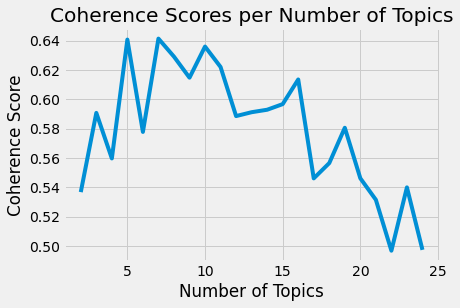

           
           
Number of Topics with the Maximum Coherence Score is:  7
This Optimal Number of Topics has a Coherence Score of:  0.6413509388489957


[(0,
  '0.114*"asthma" + 0.044*"pain" + 0.027*"mild" + 0.024*"pneumonia" + 0.023*"history" + 0.023*"renal" + 0.022*"multiple" + 0.022*"chronic" + 0.017*"status" + 0.016*"elevated"'),
 (1,
  '0.208*"medical" + 0.084*"allergy" + 0.050*"covid" + 0.038*"known" + 0.025*"use" + 0.021*"migraine" + 0.019*"past" + 0.018*"penicillin" + 0.017*"surgery" + 0.017*"ago"'),
 (2,
  '0.200*"history" + 0.155*"diabetes" + 0.124*"patient" + 0.107*"type" + 0.077*"arthritis" + 0.075*"relevant" + 0.038*"list" + 0.022*"rheumatoid" + 0.017*"insulin" + 0.016*"stroke"'),
 (3,
  '0.116*"high" + 0.103*"blood" + 0.090*"unknown" + 0.090*"pressure" + 0.044*"cholesterol" + 0.043*"apnea" + 0.043*"sleep" + 0.032*"obesity" + 0.026*"diabetic" + 0.015*"degenerative"'),
 (4,
  '0.029*"disease" + 0.025*"chronic" + 0.025*"heart" + 0.025*"disorder" + 0.022*"anxiety" + 0.020*"failure" + 0.019*"acute" + 0.017*"artery" + 0.017*"depression" + 0.016*"unspecified"'),
 (5,
  '0.253*"hypertension" + 0.098*"hypothyroidism" + 0.054*"refl

In [ ]:
# Print topics with Optimal Number of Topics
dictionary, doc_term_matrix, model_with_optimal_num_of_topics = optimal_num_topics('HISTORY', 2, 25)
model_with_optimal_num_of_topics.print_topics()

In [ ]:
# Evaluation of the model
print('Perplexity: ', model_with_optimal_num_of_topics.log_perplexity(doc_term_matrix, total_docs = 10000))  

Perplexity:  -7.496273308125423


In [ ]:
# Visualize the topics for optimal number of topics 
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(model_with_optimal_num_of_topics, doc_term_matrix, dictionary)
visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.223324  0.082354       1        1  26.377231
1      0.115686 -0.003971       2        1  15.664144
6     -0.295459  0.024635       3        1  14.780641
0     -0.127137 -0.179350       4        1  12.901546
3      0.150286  0.211836       5        1  11.803855
2      0.194887 -0.349253       6        1  10.338256
5      0.185060  0.213748       7        1   8.134326, topic_info=             Term          Freq         Total Category  logprob  loglift
466       medical  84747.000000  84747.000000  Default  30.0000  30.0000
20   hypertension  54470.000000  54470.000000  Default  29.0000  29.0000
51        history  61509.000000  61509.000000  Default  28.0000  28.0000
12       diabetes  42138.000000  42138.000000  Default  27.0000  27.0000
31         asthma  38202.000000  38202.000000  Default  26.0000  26.0000
..            ...           ...           ...      ...      ...      ...
169      allergic   3964.061440   6658.666351   Topic7  -3.9779   1.9904
171      rhinitis   2617.893995   4184.760553   Topic7  -4.3928   2.0400
241   tachycardia   2102.788848   4108.519780   Topic7  -4.6119   1.8393
15        obesity   4300.235051  18927.241237   Topic7  -3.8965   1.0271
19     depression   2512.304371  15352.689632   Topic7  -4.4340   0.6990

[315 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
396       7  0.999817  ablation
770       1  0.377552  abnormal
770       5  0.622017  abnormal
538       1  0.999928     abuse
38        7  0.999801      acid
...     ...       ...       ...
696       7  0.999883  verbatim
483       6  0.999761    visual
216       1  0.999807   vitamin
875       4  0.999887      year
260       2  0.999560       yes

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 7, 1, 4, 3, 6])

Current Illnesses of Patients

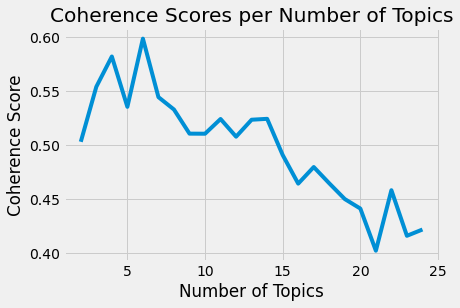

           
           
Number of Topics with the Maximum Coherence Score is:  6
This Optimal Number of Topics has a Coherence Score of:  0.5988071407550226


[(0,
  '0.028*"cancer" + 0.028*"patient" + 0.027*"pain" + 0.022*"breath" + 0.020*"fever" + 0.018*"shortness" + 0.018*"fatigue" + 0.017*"office" + 0.017*"chest" + 0.016*"migraine"'),
 (1,
  '0.058*"disease" + 0.037*"hypertension" + 0.037*"disorder" + 0.035*"chronic" + 0.033*"asthma" + 0.026*"heart" + 0.025*"history" + 0.023*"acute" + 0.020*"anxiety" + 0.016*"depression"'),
 (2,
  '0.070*"blood" + 0.060*"diabetes" + 0.059*"pressure" + 0.056*"high" + 0.050*"allergy" + 0.047*"known" + 0.047*"drug" + 0.045*"arthritis" + 0.028*"type" + 0.023*"cholesterol"'),
 (3,
  '0.046*"patient" + 0.045*"prior" + 0.039*"infection" + 0.032*"time" + 0.030*"cough" + 0.025*"cold" + 0.025*"vaccination" + 0.025*"vaccine" + 0.024*"days" + 0.024*"ed"'),
 (4,
  '0.091*"allergy" + 0.032*"pain" + 0.024*"syndrome" + 0.021*"hypothyroidism" + 0.019*"right" + 0.017*"seasonal" + 0.016*"alcohol" + 0.016*"noted" + 0.014*"penicillin" + 0.013*"left"'),
 (5,
  '0.191*"unknown" + 0.128*"covid" + 0.043*"positive" + 0.025*"negat

In [ ]:
# Print topics with Optimal Number of Topics
dictionary, doc_term_matrix, model_with_optimal_num_of_topics = optimal_num_topics('CUR_ILL', 2, 25)
model_with_optimal_num_of_topics.print_topics()

In [ ]:
# Evaluation of the model
print('Perplexity: ', model_with_optimal_num_of_topics.log_perplexity(doc_term_matrix, total_docs = 10000))  

Perplexity:  -7.580226414646801


In [ ]:
# Visualize the topics for optimal number of topics 
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(model_with_optimal_num_of_topics, doc_term_matrix, dictionary)
visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.213969 -0.269729       1        1  20.124968
4      0.193075  0.189986       2        1  17.619627
3     -0.259334  0.028305       3        1  17.592932
2      0.225897  0.029556       4        1  16.484890
0     -0.127988  0.230134       5        1  15.860676
5     -0.245619 -0.208251       6        1  12.316907, topic_info=         Term          Freq         Total Category  logprob  loglift
226   unknown  17708.000000  17708.000000  Default  30.0000  30.0000
7       covid  14558.000000  14558.000000  Default  29.0000  29.0000
654   allergy  18263.000000  18263.000000  Default  28.0000  28.0000
209     blood   8657.000000   8657.000000  Default  27.0000  27.0000
66    disease   8774.000000   8774.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
27       date    925.759341   1251.593450   Topic6  -4.6066   1.7926
60     taking    615.175576    954.895873   Topic6  -5.0153   1.6545
254      loss    615.519814   1542.305086   Topic6  -5.0147   1.1756
417  hospital    644.176068   2124.681057   Topic6  -4.9692   0.9008
293      care    658.000358   2825.583774   Topic6  -4.9480   0.6369

[305 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1603      2  0.999626  abdominal
517       1  0.143311   abnormal
517       4  0.856815   abnormal
628       1  0.999429       acid
167       1  0.999944      acute
...     ...       ...        ...
20        6  0.012603       week
1470      4  0.998391     weight
1188      6  0.999568      worse
764       4  0.999438  worsening
2752      3  0.999085         yo

[414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1, 6])

Other Medications Taken by Patients

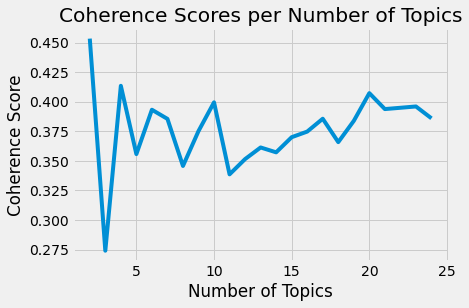

           
           
Number of Topics with the Maximum Coherence Score is:  2
This Optimal Number of Topics has a Coherence Score of:  0.45333987715139945


[(0,
  '0.234*"vitamin" + 0.055*"aspirin" + 0.055*"calcium" + 0.048*"unknown" + 0.039*"oil" + 0.035*"magnesium" + 0.035*"acid" + 0.031*"fish" + 0.023*"zinc" + 0.018*"complex"'),
 (1,
  '0.152*"tablet" + 0.085*"daily" + 0.047*"day" + 0.035*"po" + 0.027*"oral" + 0.024*"capsule" + 0.020*"aspirin" + 0.019*"tab" + 0.018*"inhaler" + 0.017*"mouth"')]

In [ ]:
# Print topics with Optimal Number of Topics
dictionary, doc_term_matrix, model_with_optimal_num_of_topics = optimal_num_topics('OTHER_MEDS', 2, 25)
model_with_optimal_num_of_topics.print_topics()

In [ ]:
# Evaluation of the model
print('Perplexity: ', model_with_optimal_num_of_topics.log_perplexity(doc_term_matrix, total_docs = 10000))  

Perplexity:  -6.160472999437523


In [ ]:
# Visualize the topics for optimal number of topics 
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(model_with_optimal_num_of_topics, doc_term_matrix, dictionary)
visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.312209  0.0       1        1  52.859026
0     -0.312209  0.0       2        1  47.140974, topic_info=         Term           Freq          Total Category  logprob  loglift
28    vitamin  138142.000000  138142.000000  Default  30.0000  30.0000
66     tablet  100334.000000  100334.000000  Default  29.0000  29.0000
40      daily   56227.000000   56227.000000  Default  28.0000  28.0000
61    calcium   32561.000000   32561.000000  Default  27.0000  27.0000
69    unknown   28276.000000   28276.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
48  potassium    9473.803259   10616.262596   Topic2  -4.1308   0.6382
21    aspirin   32582.986890   45548.593465   Topic2  -2.8955   0.4170
19         fe    3799.989755    4904.104420   Topic2  -5.0443   0.4970
14    thyroid    3008.425033    5221.192335   Topic2  -5.2779   0.2007
15  estradiol    3013.251326    5429.998211   Topic2  -5.2763   0.1631

[110 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
85        1  0.000341     acid
85        2  0.999646     acid
142       1  0.999901  allergy
142       2  0.000272  allergy
103       1  0.034040      asa
...     ...       ...      ...
28        1  0.000007  vitamin
28        2  0.999993  vitamin
111       1  0.999821     week
111       2  0.000291     week
29        2  0.999949     zinc

[135 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

Main Symptoms

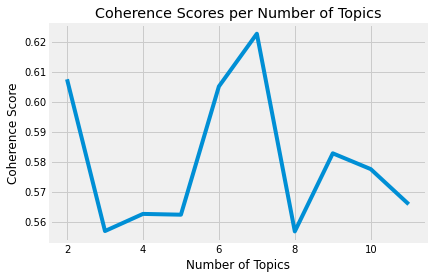

           
           
Number of Topics with the Maximum Coherence Score is:  7
This Optimal Number of Topics has a Coherence Score of:  0.6227477980255308


[(0,
  '0.116*"patient" + 0.092*"covid" + 0.040*"dose" + 0.030*"included" + 0.027*"vaccine" + 0.025*"vaccination" + 0.020*"received" + 0.020*"positive" + 0.016*"prior" + 0.012*"tested"'),
 (1,
  '0.020*"blood" + 0.017*"heart" + 0.016*"patient" + 0.015*"chest" + 0.012*"hospital" + 0.012*"home" + 0.012*"breath" + 0.011*"normal" + 0.010*"acute" + 0.009*"shortness"'),
 (2,
  '0.069*"site" + 0.068*"arm" + 0.055*"injection" + 0.044*"pain" + 0.042*"swelling" + 0.039*"left" + 0.038*"rash" + 0.032*"vaccination" + 0.032*"swollen" + 0.028*"red"'),
 (3,
  '0.067*"vaccine" + 0.037*"case" + 0.036*"dosage" + 0.034*"received" + 0.027*"form" + 0.024*"product" + 0.023*"vaccination" + 0.022*"provided" + 0.020*"experienced" + 0.018*"unknown"'),
 (4,
  '0.076*"patient" + 0.064*"unknown" + 0.060*"covid" + 0.054*"dose" + 0.038*"date" + 0.034*"vaccine" + 0.033*"outcome" + 0.032*"received" + 0.030*"unspecified" + 0.027*"number"'),
 (5,
  '0.077*"pain" + 0.043*"fever" + 0.043*"headache" + 0.034*"fatigue" + 0.03

In [72]:
# Print topics with Optimal Number of Topics (For some reason took way too long for this column!)
dictionary, doc_term_matrix, model_with_optimal_num_of_topics = optimal_num_topics('SYMPTOM_TEXT', 2, 12)
model_with_optimal_num_of_topics.print_topics()

In [73]:
# Evaluation of the model
print('Perplexity: ', model_with_optimal_num_of_topics.log_perplexity(doc_term_matrix, total_docs = 10000))  

Perplexity:  -6.811960797698925


In [74]:
# Visualize the topics for optimal number of topics 
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(model_with_optimal_num_of_topics, doc_term_matrix, dictionary)
visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.179325 -0.012863       1        1  19.503540
4     -0.267091  0.056091       2        1  18.700133
5      0.266469  0.008669       3        1  14.504121
1      0.098617 -0.343051       4        1  13.752688
0     -0.240921  0.003697       5        1  12.869167
2      0.191542  0.274678       6        1  10.509974
3     -0.227941  0.012779       7        1  10.160378, topic_info=            Term          Freq         Total Category  logprob  loglift
20       patient  1.626448e+06  1.626448e+06  Default  30.0000  30.0000
150        covid  1.228227e+06  1.228227e+06  Default  29.0000  29.0000
102         pain  9.599510e+05  9.599510e+05  Default  28.0000  28.0000
1225     unknown  6.927930e+05  6.927930e+05  Default  27.0000  27.0000
52          site  3.640310e+05  3.640310e+05  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
459   additional  3.980281e+04  7.858818e+04   Topic7  -4.8485   1.6064
20       patient  5.442136e+04  1.626448e+06   Topic7  -4.5356  -1.1107
150        covid  5.267509e+04  1.228228e+06   Topic7  -4.5683  -0.8625
1727     booster  4.418431e+04  2.130453e+05   Topic7  -4.7440   0.7135
508      medical  4.114855e+04  2.839211e+05   Topic7  -4.8152   0.3552

[509 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5884      7  0.999975         aa
58        3  0.993777  abdominal
58        5  0.000807  abdominal
58        6  0.000016  abdominal
58        7  0.005389  abdominal
...     ...       ...        ...
374       4  0.991901  worsening
374       6  0.000380  worsening
1574      2  0.999949      wrong
1446      4  0.999564         yo
1446      5  0.000409         yo

[1018 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 2, 1, 3, 4])